### Hey there! In this notebook, we are going to build and test some ML models using different algorithms. We're using a credit risk dataset, which can be found in the file itself.


**LOADING THE DATA**


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

In [4]:
pd.set_option('display.max_columns', 20)
df = pd.read_csv('clean_data.csv').drop(['ID'],axis=1)
df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


**DATA PREPROCESSING**


In [5]:
df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [6]:
df = pd.get_dummies(df,columns=['Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']).replace({True:1,False:0})

In [7]:
df.isna().sum()

Gender                                          0
Own_car                                         0
Own_property                                    0
Work_phone                                      0
Phone                                           0
Email                                           0
Unemployed                                      0
Num_children                                    0
Num_family                                      0
Account_length                                  0
Total_income                                    0
Age                                             0
Years_employed                                  0
Target                                          0
Income_type_Commercial associate                0
Income_type_Pensioner                           0
Income_type_State servant                       0
Income_type_Student                             0
Income_type_Working                             0
Education_type_Academic degree                  0


In [8]:
input_cols = [col for col in df.columns if col != 'Target']
target_col = 'Target'



In [9]:
X = df[input_cols]
y = df[target_col]



In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [11]:
# Define evaluation functions
def rmse(x, y): return np.sqrt(np.mean(np.square(x - y)))
def mae(x, y): return np.mean(np.abs(x - y))
def mse(x, y): return np.mean(np.square(x - y))



In [12]:
def evaluate_model(y_true, y_pred):
    return {
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'MSE': mse(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }



Now, let's build and test the model with different ML algorithms.

In [13]:
# Random Forest
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_metrics = evaluate_model(y_test, rf_preds)



In [14]:
# Logistic Regression
lr_model = LogisticRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_metrics = evaluate_model(y_test, lr_preds)

In [15]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2**5, class_weight={0:2, 1:1})
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_metrics = evaluate_model(y_test, dt_preds)



In [16]:
# AdaBoost
ada_model = AdaBoostClassifier(random_state=42, algorithm='SAMME.R', learning_rate=0.8, n_estimators=100)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)
ada_metrics = evaluate_model(y_test, ada_preds)



In [17]:
# CatBoost
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.02, depth=12, eval_metric='AUC', random_seed=2018, bagging_temperature=0.2, od_type='Iter', metric_period=50, od_wait=100)
cat_model.fit(X_train, y_train, verbose=0)
cat_preds = cat_model.predict(X_test)
cat_metrics = evaluate_model(y_test, cat_preds)



In [18]:
# Display results
print("Random Forest Metrics:")
print(rf_metrics)
print("\nLogistic Regression Metrics:")
print(lr_metrics)
print("\nDecision Tree Metrics:")
print(dt_metrics)
print("\nAdaBoost Metrics:")
print(ada_metrics)
print("\nCatBoost Metrics:")
print(cat_metrics)



Random Forest Metrics:
{'RMSE': 0.38021497430878837, 'MAE': 0.14456342668863262, 'MSE': 0.14456342668863262, 'AUC-ROC': 0.5021352949264403, 'F1 Score': 0.011267605633802818, 'Precision': 0.4, 'Recall': 0.005714285714285714}

Logistic Regression Metrics:
{'RMSE': 0.37749717696447077, 'MAE': 0.14250411861614498, 'MSE': 0.14250411861614498, 'AUC-ROC': 0.5057142857142857, 'F1 Score': 0.02259887005649718, 'Precision': 1.0, 'Recall': 0.011428571428571429}

Decision Tree Metrics:
{'RMSE': 0.380756205862925, 'MAE': 0.14497528830313014, 'MSE': 0.14497528830313014, 'AUC-ROC': 0.5007067234978688, 'F1 Score': 0.005649717514124295, 'Precision': 0.25, 'Recall': 0.002857142857142857}

AdaBoost Metrics:
{'RMSE': 0.38183636748236177, 'MAE': 0.1457990115321252, 'MSE': 0.1457990115321252, 'AUC-ROC': 0.49903753609239654, 'F1 Score': 0.0, 'Precision': 0.0, 'Recall': 0.0}

CatBoost Metrics:
{'RMSE': 0.3791301932840981, 'MAE': 0.14373970345963757, 'MSE': 0.14373970345963757, 'AUC-ROC': 0.5014285714285714, 'F

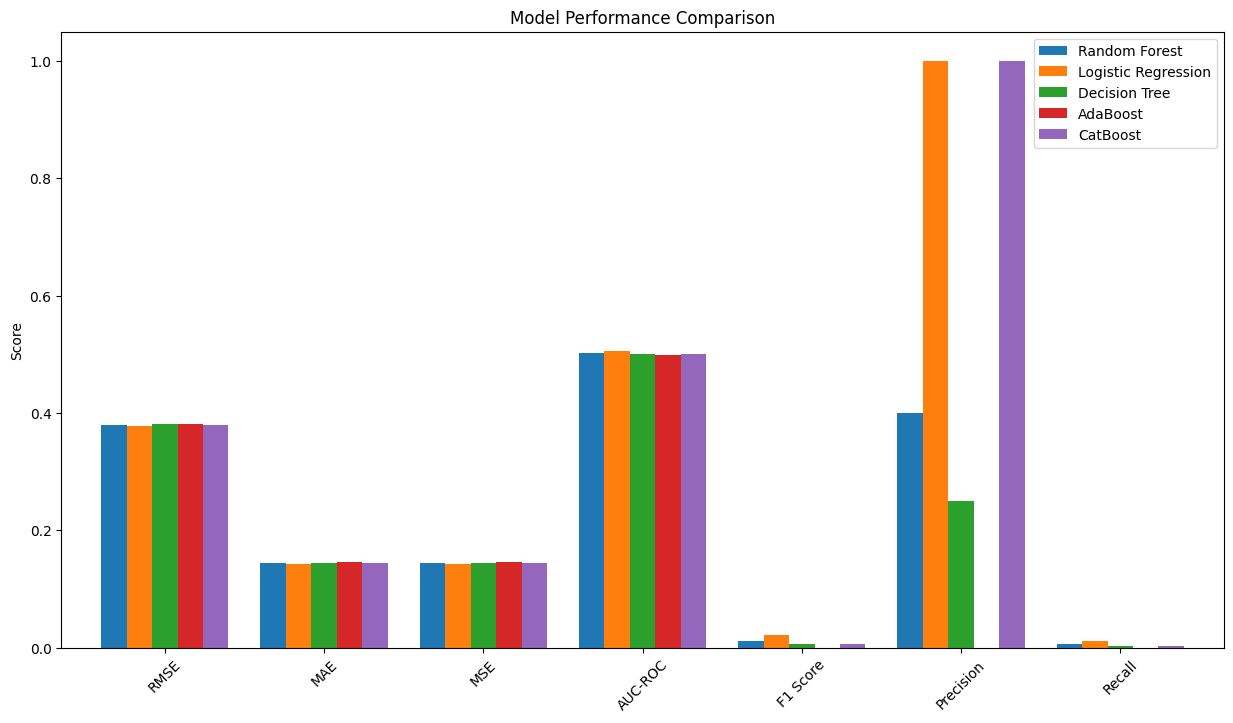

In [23]:
# Visualize metrics
metrics_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'AdaBoost': ada_metrics,
    'CatBoost': cat_metrics
})

metrics_df.plot(kind='bar', figsize=(15, 8),width =0.8)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()
